# How to handle audio data?


Audio data analysis is about analyzing and understanding audio signals captured by digital devices, with numerous applications in the enterprise, healthcare, productivity, and smart cities.

## Audio file overview

The sound excerpts are digital audio files in .wav format. Sound waves are digitized by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD-quality audio meaning samples are taken 44,100 times per second).


Each sample is the amplitude of the wave at a particular time interval, where the bit depth determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values).

## Audio Data Handling using Python

Sound is represented in the form of an audio signal having parameters such as frequency, bandwidth, decibel, etc. A typical audio signal can be expressed as a function of Amplitude and Time shown below:

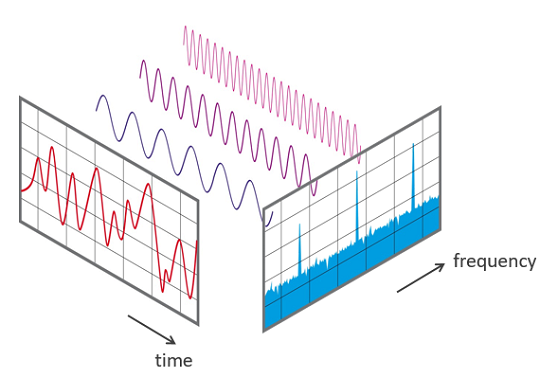

There are devices built that help you catch these sounds and represent it in a computer-readable format. Examples of these formats are

wav (Waveform Audio File) format

mp3 (MPEG-1 Audio Layer 3) format

WMA (Windows Media Audio) format

A typical audio processing process involves the extraction of acoustics features relevant to the task at hand, followed by decision-making schemes that involve detection, classification, and knowledge fusion. Thankfully we have some useful python libraries which make this task easier.

## Reading & Understanding Audio data

Python has some great libraries for audio processing like Librosa and PyAudio.There are also built-in modules for some basic audio functionalities.

We will mainly use two libraries for audio acquisition and playback:


### 1. Librosa


It is a Python module to analyze audio signals in general but geared more towards music. It includes the nuts and bolts to build a MIR(Music information retrieval) system. It has been very well documented along with a lot of examples and tutorials.

Installation:

```pip install librosa```

or

```conda install -c conda-forge librosa```


To fuel more audio-decoding power, you can install **ffmpeg** which ships with many audio decoders.


### 2. IPython.display.Audio


IPython.display.Audio lets you play audio directly in a jupyter notebook.

In [2]:
import librosa, IPython
import librosa.display
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file = '../input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00005.wav'
Signal , sr = librosa.load(file , sr = 22050) # n_samples = 2.6 * 60 * 22050

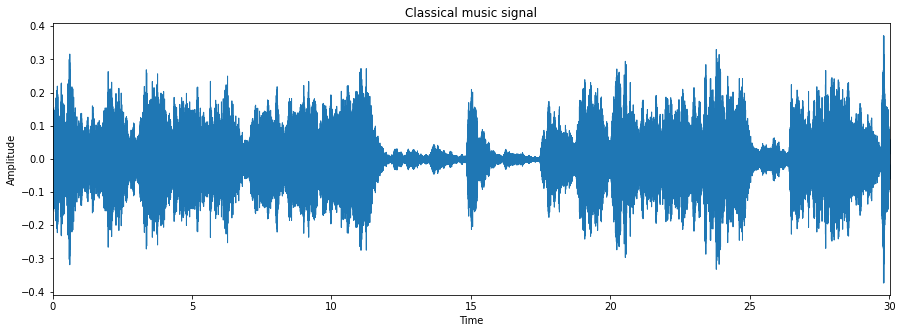

In [4]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(Signal , sr = sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Classical music signal")
plt.show()

#### play sample file

In [5]:
# play sample file
IPython.display.Audio(Signal, rate=sr)

### Spectrogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.


A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

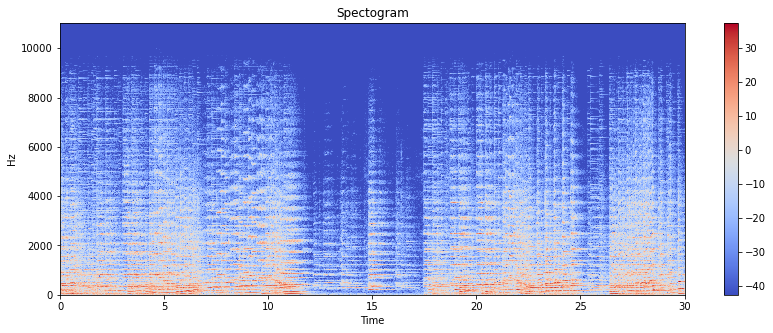

In [6]:
#Spectogram
X = librosa.stft(Signal)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title("Spectogram")
plt.colorbar()

### Feature extraction from Audio signal

Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.


The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

### 1. Spectral Centroid


The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.

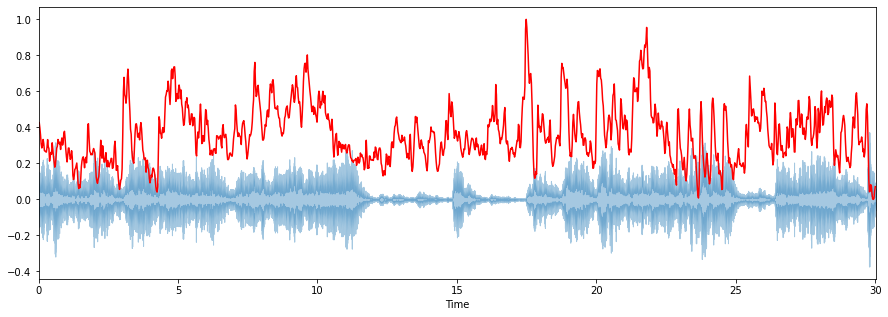

In [7]:
spectral_centroids = librosa.feature.spectral_centroid(Signal, sr=sr)[0]
#.spectral_centroid will return an array with columns equal to the number of frames present in your sample.

# Computing the time variable for visualization
plt.figure(figsize=(15, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(Signal, axis=0):
    return sklearn.preprocessing.minmax_scale(Signal, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### 2. Spectral Rolloff


It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

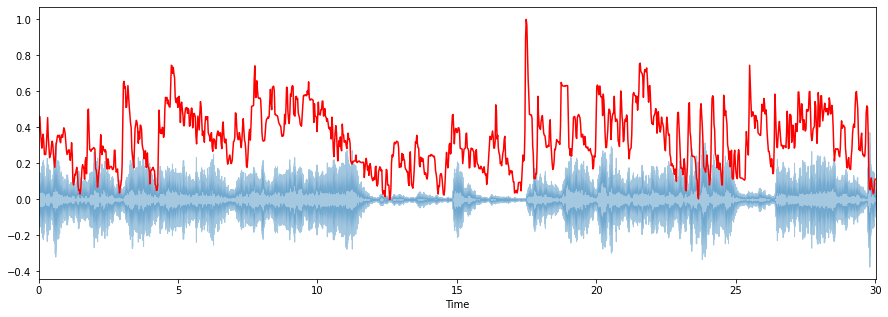

In [8]:
spectral_rolloff = librosa.feature.spectral_rolloff(Signal+0.01, sr=sr)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### 3. Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

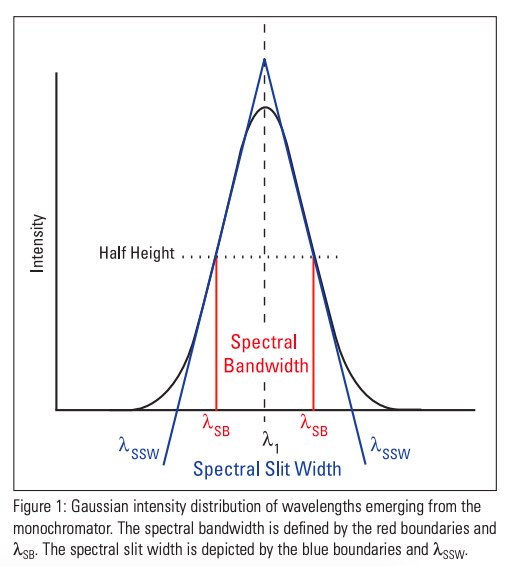

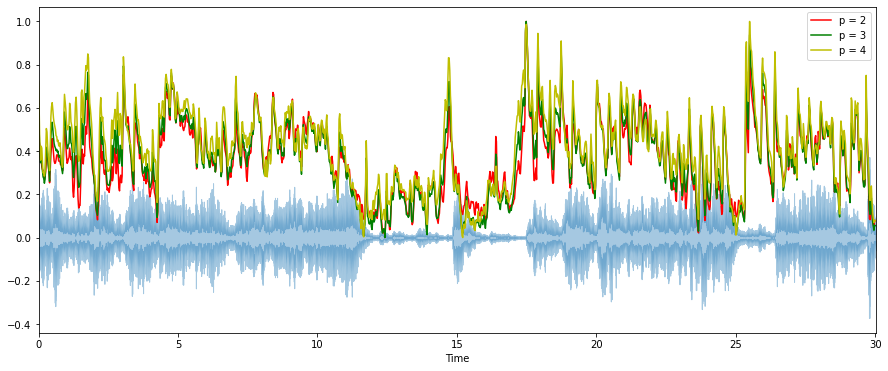

In [9]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(Signal+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(Signal+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(Signal+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 6))
librosa.display.waveplot(Signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

### 4. Zero-Crossing Rate


A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.
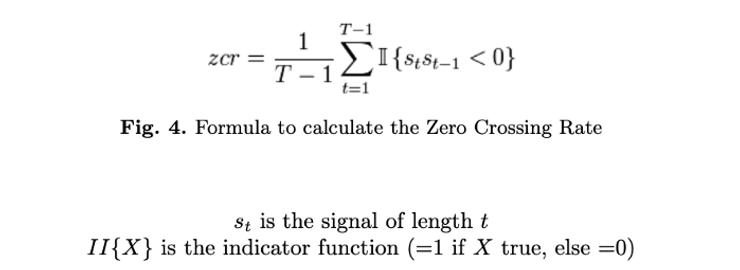

It usually has higher values for highly percussive sounds like those in metal and rock.

In [10]:
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(Signal[n0:n1], pad=False)
print(sum(zero_crossings))#16

7


We have 7 zero crossings, now lets verify it by visualizing the signal.

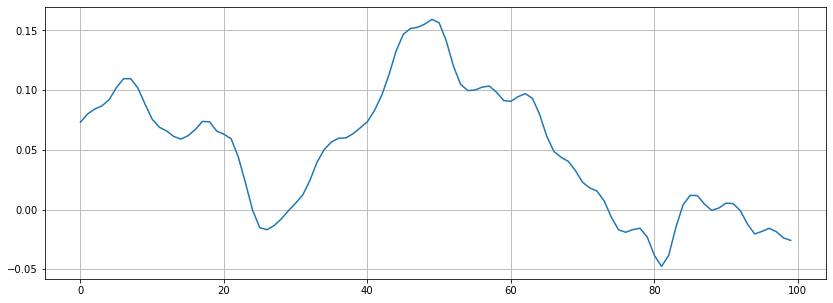

In [11]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(Signal[n0:n1])
plt.grid()

### 5. Mel-Frequency Cepstral Coefficients(MFCCs)


The Mel frequency cepstral coefficients (**MFCCs**) of a signal are a small set of features (usually about 10–20) that concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

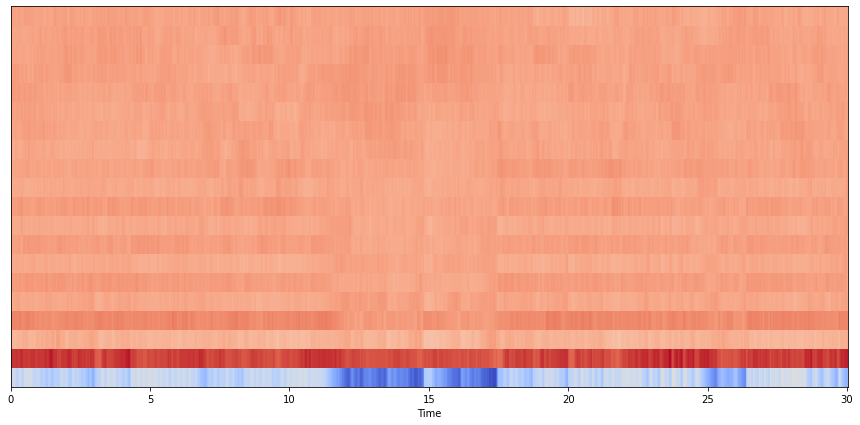

In [13]:
mfccs = librosa.feature.mfcc(Signal, sr=sr)

#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### 6. Chroma feature


A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(Signal, sr=sr, hop_length=hop_length)
plt.figure(figsize=(20, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

Now that we understood how we can play around with audio data and extract important features using python. In the next section section, we are going to use these features and build an Neural Network for music genre classification.